In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score
import numpy as np

from sklearn.preprocessing import StandardScaler
from scipy import stats
import plotly.graph_objects as go
import plotly.express as px  # For easier rendering
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv("GOOG.csv")
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,800.0000,713.1200,716.480,1306065,718.27,722.4700,713.1200,716.480,1306065,0,1
1,GOOG,2016-06-15 00:00:00+00:00,718.92,900.0000,717.3100,719.000,1214517,718.92,722.9800,717.3100,719.000,1214517,0,1
2,GOOG,2016-06-16 00:00:00+00:00,710.36,750.0000,703.2600,714.910,1982471,710.36,716.6500,703.2600,714.910,1982471,0,1
3,GOOG,2016-06-17 00:00:00+00:00,691.72,700.0000,688.4515,708.650,3402357,691.72,708.8200,688.4515,708.650,3402357,0,1
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.4800,693.4100,789.000,2082538,693.71,702.4800,693.4100,698.770,2082538,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,GOOG,2021-05-20 00:00:00+00:00,2356.09,2360.3400,2321.0900,2328.040,1191593,2356.09,2360.3400,2321.0900,2328.040,1191593,0,1
1243,GOOG,2021-05-21 00:00:00+00:00,2345.10,2368.9999,2342.3700,2365.990,1141632,2345.10,2368.9999,2342.3700,2365.990,1141632,0,1
1244,GOOG,2021-05-24 00:00:00+00:00,2406.67,2418.4800,2360.1100,2367.000,1062189,2406.67,2418.4800,2360.1100,2367.000,1062189,0,1
1245,GOOG,2021-05-25 00:00:00+00:00,2409.07,2432.8900,2402.9900,2420.000,941928,2409.07,2432.8900,2402.9900,2420.000,941928,0,1


In [3]:
df['date'] = pd.to_datetime(df['date']).dt.date
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14,718.27,800.0000,713.1200,716.480,1306065,718.27,722.4700,713.1200,716.480,1306065,0,1
1,GOOG,2016-06-15,718.92,900.0000,717.3100,719.000,1214517,718.92,722.9800,717.3100,719.000,1214517,0,1
2,GOOG,2016-06-16,710.36,750.0000,703.2600,714.910,1982471,710.36,716.6500,703.2600,714.910,1982471,0,1
3,GOOG,2016-06-17,691.72,700.0000,688.4515,708.650,3402357,691.72,708.8200,688.4515,708.650,3402357,0,1
4,GOOG,2016-06-20,693.71,702.4800,693.4100,789.000,2082538,693.71,702.4800,693.4100,698.770,2082538,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,GOOG,2021-05-20,2356.09,2360.3400,2321.0900,2328.040,1191593,2356.09,2360.3400,2321.0900,2328.040,1191593,0,1
1243,GOOG,2021-05-21,2345.10,2368.9999,2342.3700,2365.990,1141632,2345.10,2368.9999,2342.3700,2365.990,1141632,0,1
1244,GOOG,2021-05-24,2406.67,2418.4800,2360.1100,2367.000,1062189,2406.67,2418.4800,2360.1100,2367.000,1062189,0,1
1245,GOOG,2021-05-25,2409.07,2432.8900,2402.9900,2420.000,941928,2409.07,2432.8900,2402.9900,2420.000,941928,0,1


In [4]:
df.drop(columns=['symbol', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'], axis=1,inplace=True)
df


,date,close,high,low,open,volume
0,2016-06-14,718.27,800.0000,713.1200,716.480,1306065
1,2016-06-15,718.92,900.0000,717.3100,719.000,1214517
2,2016-06-16,710.36,750.0000,703.2600,714.910,1982471
3,2016-06-17,691.72,700.0000,688.4515,708.650,3402357
4,2016-06-20,693.71,702.4800,693.4100,789.000,2082538
...,...,...,...,...,...,...
1242,2021-05-20,2356.09,2360.3400,2321.0900,2328.040,1191593
1243,2021-05-21,2345.10,2368.9999,2342.3700,2365.990,1141632
1244,2021-05-24,2406.67,2418.4800,2360.1100,2367.000,1062189
1245,2021-05-25,2409.07,2432.8900,2402.9900,2420.000,941928


In [5]:
df.duplicated().values.any()

False

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1247 non-null   object 
 1   close   1247 non-null   float64
 2   high    1239 non-null   float64
 3   low     1237 non-null   float64
 4   open    1239 non-null   float64
 5   volume  1247 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 58.6+ KB


In [7]:
df.isnull().sum()

date       0
close      0
high       8
low       10
open       8
volume     0
dtype: int64

In [8]:
imputer = SimpleImputer(missing_values=np.nan , strategy='median')
columns_to_impute = ['high', 'low','open']

df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

df

,date,close,high,low,open,volume
0,2016-06-14,718.27,800.0000,713.1200,716.480,1306065
1,2016-06-15,718.92,900.0000,717.3100,719.000,1214517
2,2016-06-16,710.36,750.0000,703.2600,714.910,1982471
3,2016-06-17,691.72,700.0000,688.4515,708.650,3402357
4,2016-06-20,693.71,702.4800,693.4100,789.000,2082538
...,...,...,...,...,...,...
1242,2021-05-20,2356.09,2360.3400,2321.0900,2328.040,1191593
1243,2021-05-21,2345.10,2368.9999,2342.3700,2365.990,1141632
1244,2021-05-24,2406.67,2418.4800,2360.1100,2367.000,1062189
1245,2021-05-25,2409.07,2432.8900,2402.9900,2420.000,941928


In [9]:
df.isnull().sum()

date      0
close     0
high      0
low       0
open      0
volume    0
dtype: int64

In [10]:
df.describe()

,close,high,low,open,volume
count,1247.000000,1247.000000,1247.000000,1247.000000,1.247000e+03
mean,1205.396528,1219.074939,1196.466779,1206.751147,1.604924e+06
std,366.846916,369.393718,359.764563,364.214064,6.976014e+05
min,668.260000,672.300000,663.284000,612.000000,3.467530e+05
25%,957.580000,973.135000,960.350000,968.105000,1.174306e+06
50%,1129.990000,1143.000000,1117.830000,1131.070000,1.415473e+06
75%,1350.690000,1364.085000,1342.725000,1350.520000,1.815700e+06
max,2433.530000,2452.378000,2412.515000,2420.000000,6.207027e+06


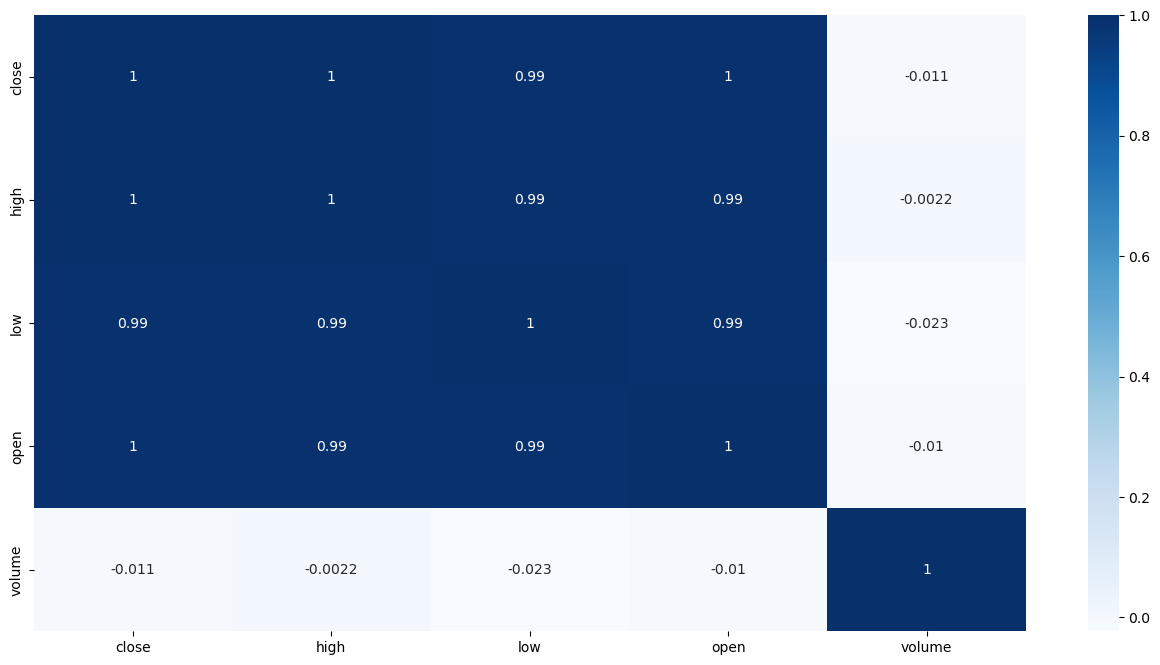

In [11]:
numeric_df = df.select_dtypes(include=['number'])
correlations = numeric_df.corr()
plt.figure(figsize=(16,8))
sns.heatmap(numeric_df.corr(), cmap="Blues", annot=True)
plt.show()

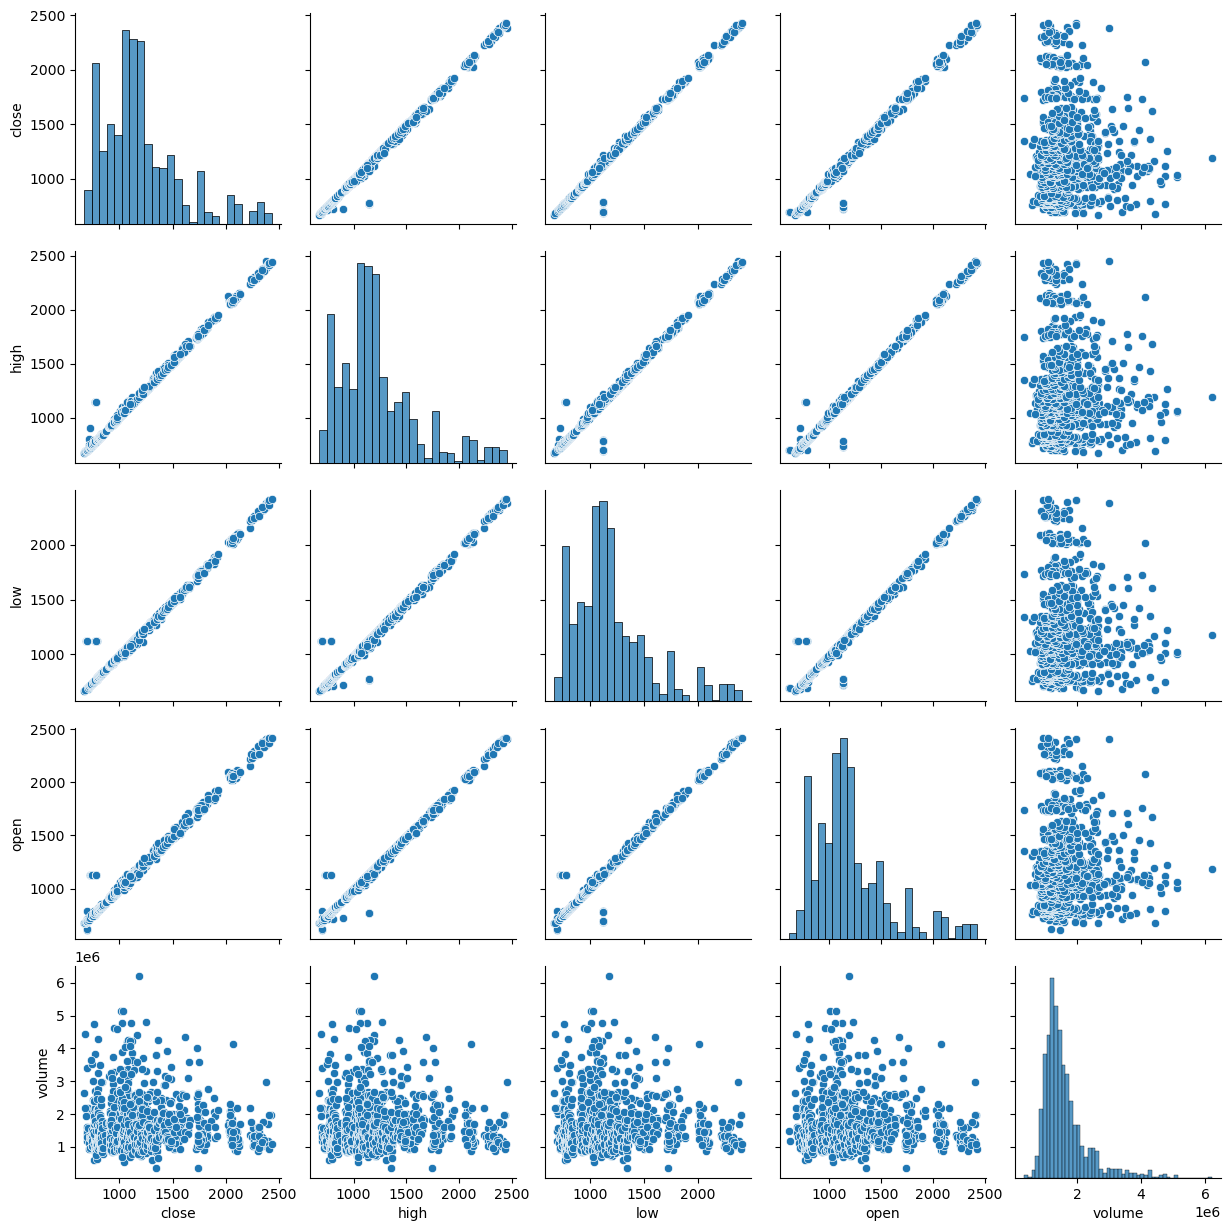

In [12]:
sns.pairplot(df)


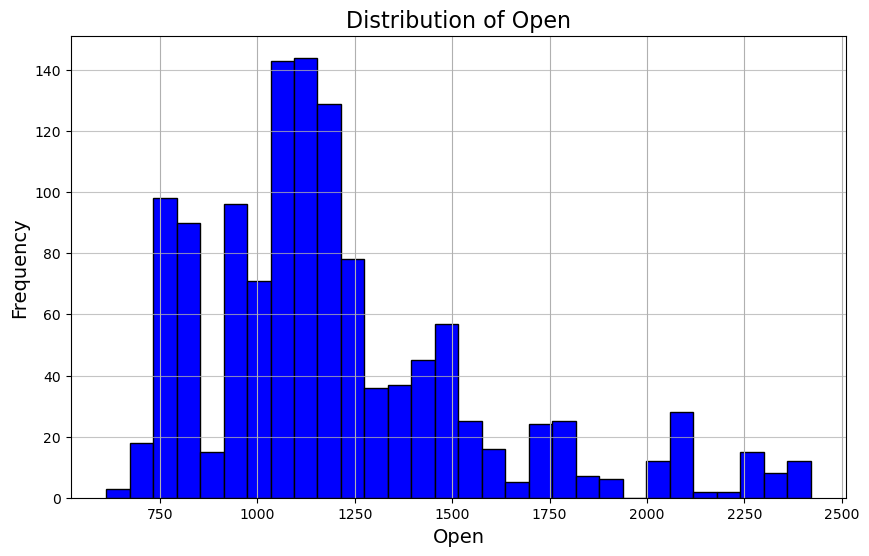

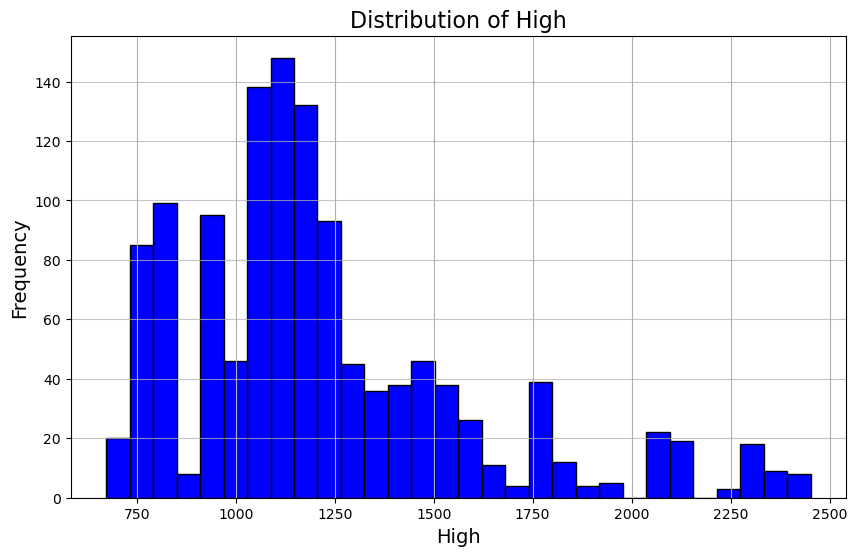

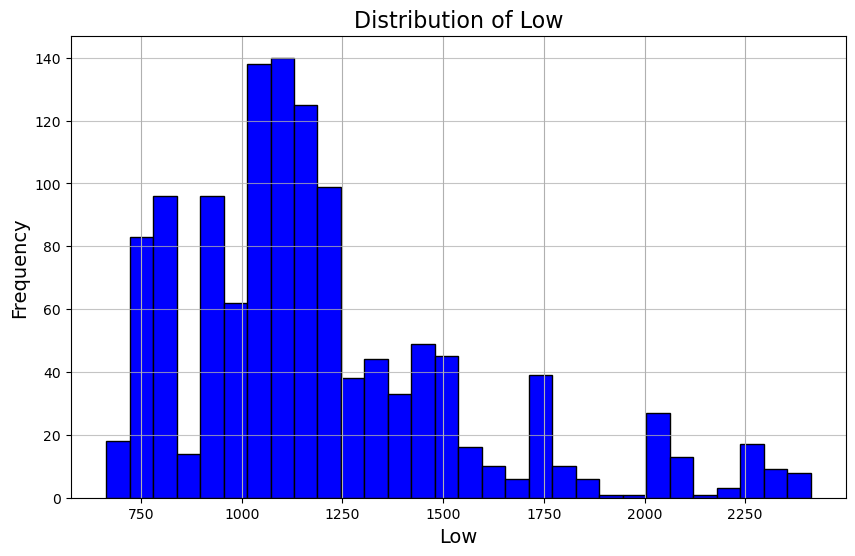

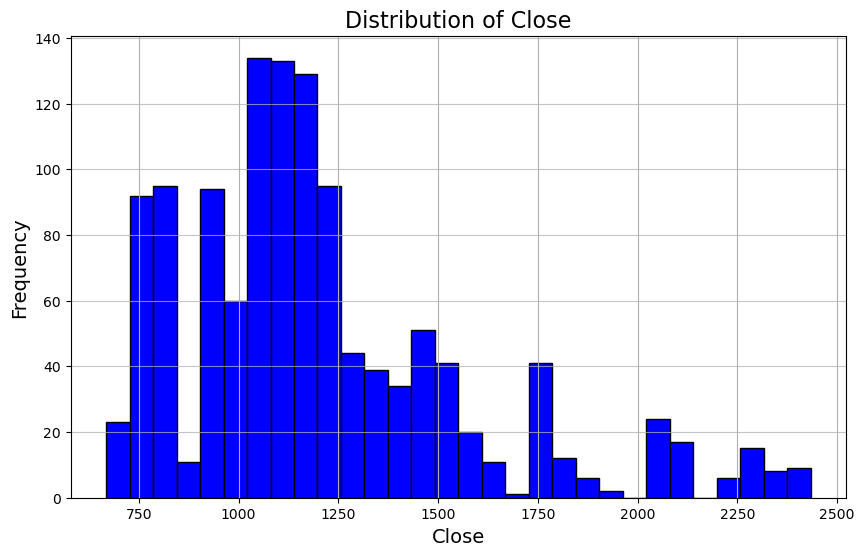

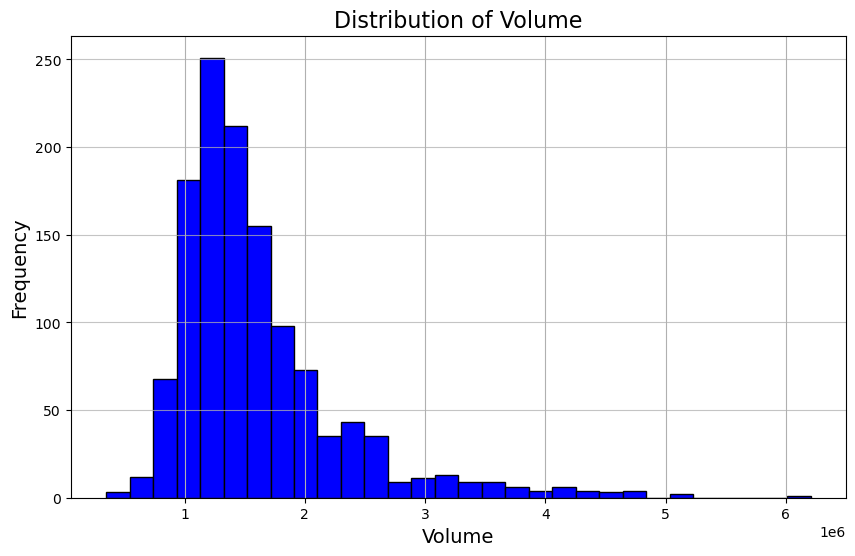

In [13]:
columns_to_plot = ['open', 'high', 'low', 'close', 'volume']
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    df[column].hist(bins=30, color='blue', edgecolor='black')
    plt.title(f'Distribution of {column.capitalize()}', fontsize=16)
    plt.xlabel(column.capitalize(), fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(axis='y', alpha=0.75)
    plt.show()

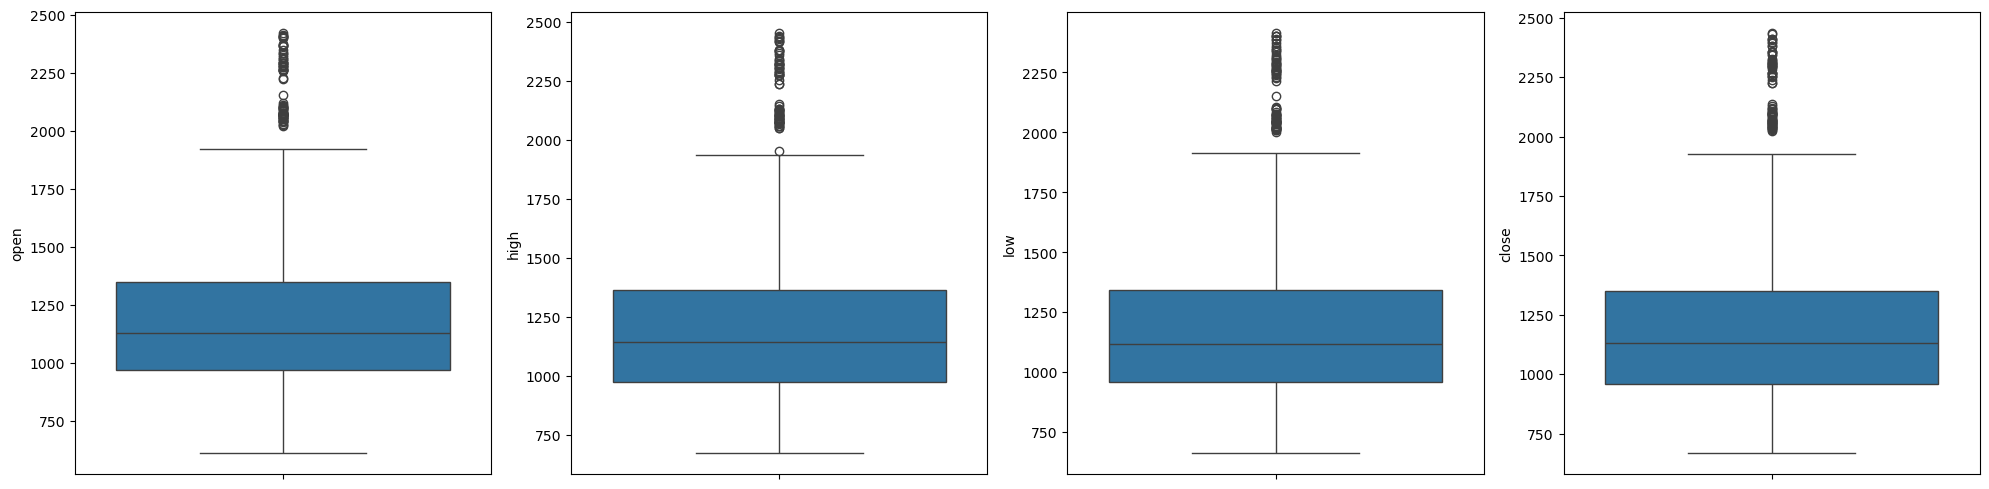

In [14]:
f, axes = plt.subplots(1, 4, figsize=(20,5))
sns.boxplot(y='open', data=df, ax=axes[0])
sns.boxplot(y='high', data=df, ax=axes[1])
sns.boxplot(y='low', data=df, ax=axes[2])
sns.boxplot(y='close', data=df, ax=axes[3])
plt.tight_layout()
plt.show()

In [15]:
scaler = StandardScaler()


In [16]:
scaled_data = scaler.fit_transform(df.select_dtypes(include=['number']))

scaled_df = pd.DataFrame(scaled_data, columns=df.select_dtypes(include=['number']).columns)

df[df.select_dtypes(include=['number']).columns] = scaled_df

In [17]:
df.head()

,date,close,high,low,open,volume
0,2016-06-14,-1.328407,-1.134949,-1.344048,-1.346647,-0.428581
1,2016-06-15,-1.326634,-0.864127,-1.332396,-1.339725,-0.559866
2,2016-06-16,-1.349978,-1.270360,-1.371465,-1.350960,0.541425
3,2016-06-17,-1.400809,-1.405772,-1.412644,-1.368154,2.577625
4,2016-06-20,-1.395383,-1.399055,-1.398855,-1.147454,0.684927


In [18]:
figure = go.Figure(data=[go.Candlestick(x=df["date"],
                                        open=df["open"], high=df["high"],
                                        low=df["low"], close=df["close"])])

figure.update_layout(title="Google Stock Price Analysis after scalling", xaxis_rangeslider_visible=False)
figure.show()

In [19]:
X=df[['open','high','low','volume']].values
Y=df['close'].values

In [20]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# Assuming X and Y are your features and target variables
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize Lasso with an alpha value for regularization strength
lasso = Lasso(alpha=0.1)  # Regularization strength, can be tuned

# Fit the Lasso model (linear regression with Lasso regularization)
lasso.fit(x_train, y_train)

# Make predictions
y_predict = lasso.predict(x_test)

In [21]:
from sklearn.metrics import mean_squared_error , mean_absolute_error,r2_score
import math
mse = mean_squared_error(y_test , y_predict)
mae = mean_absolute_error(y_test , y_predict)
acc = r2_score(y_test , y_predict)
print(f"Mean Square Error: {round(mse , 2)}")
print(f"Mean Error: {round(mae , 2)}")
print(f"R2: {round(acc , 4)*100}%")

Mean Square Error: 0.02
Mean Error: 0.09
R2: 98.21%


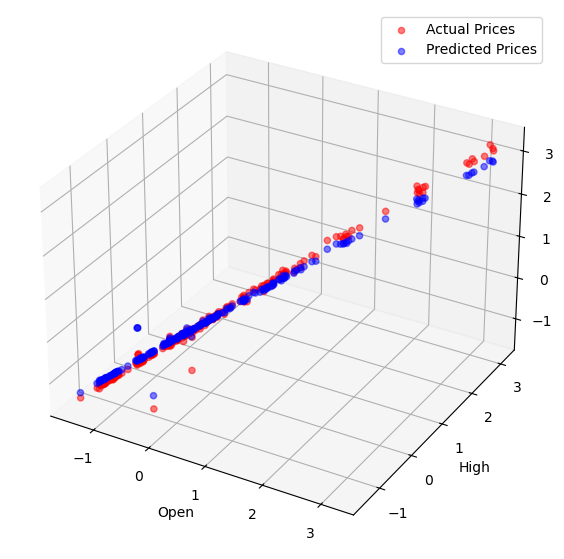

In [22]:
y_predict = lasso.predict(x_test)

# Select three features (you can experiment with 'open', 'high', 'low', 'volume')
# For visualization, let's use 'open', 'high', and 'low'
x_plot = x_test[:, [0, 1, 2]]  # Selecting 'open', 'high', 'low'

# Create a 3D plot for actual vs predicted prices
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot actual prices (using x_plot as features)
ax.scatter(x_plot[:, 0], x_plot[:, 1], y_test, color='r', label='Actual Prices', alpha=0.5)

# Plot predicted prices (using x_plot as features)
ax.scatter(x_plot[:, 0], x_plot[:, 1], y_predict, color='b', label='Predicted Prices', alpha=0.5)

# Labels and legend
ax.set_xlabel('Open')
ax.set_ylabel('High')
ax.set_zlabel('Close Price')
ax.legend()

plt.show()

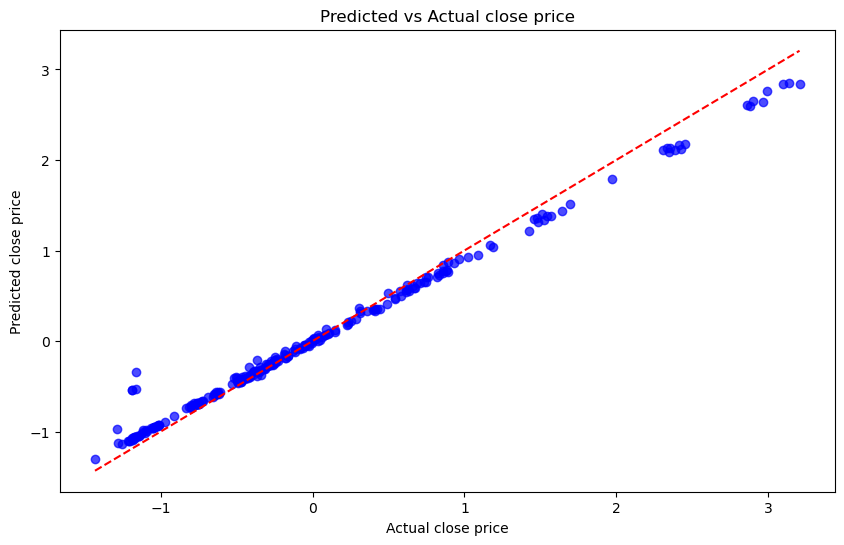

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predict, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Predicted vs Actual close price")
plt.xlabel("Actual close price")
plt.ylabel("Predicted close price")
plt.show()

In [24]:
new_data = pd.read_csv("unseen_data.csv")
new_data_features = new_data[['open', 'high', 'low', 'volume']] 
new_data_scaled = scaler.fit_transform(new_data_features) 


predictions_scaled = lasso.predict(new_data_scaled)  

close_scaler = StandardScaler()  
close_scaler.fit(new_data[['close']])  

predictions_unscaled = close_scaler.inverse_transform(predictions_scaled.reshape(-1, 1))
new_data['predicted_close'] = predictions_unscaled

if 'close' in new_data.columns:
    r2 = r2_score(new_data['close'], predictions_unscaled)
    
    print(f"R² score on new data: {r2}")
else:
    print("Actual 'close' values not found for R² evaluation.")

print(new_data[['date', 'predicted_close']])


R² score on new data: 0.9895963566045758
                         date  predicted_close
0   2021-05-27 00:00:00+00:00      2405.268642
1   2021-05-28 00:00:00+00:00      2397.029581
2   2021-06-01 00:00:00+00:00      2401.880142
3   2021-06-02 00:00:00+00:00      2406.416628
4   2021-06-03 00:00:00+00:00      2377.905210
5   2021-06-04 00:00:00+00:00      2412.731336
6   2021-06-07 00:00:00+00:00      2429.639727
7   2021-06-08 00:00:00+00:00      2453.835493
8   2021-06-09 00:00:00+00:00      2466.361721
9   2021-06-10 00:00:00+00:00      2476.334312
10  2021-06-11 00:00:00+00:00      2484.812999
11  2016-06-21 00:00:00+00:00       839.877134
12  2016-07-26 00:00:00+00:00       891.614269


In [25]:
import numpy as np
from sklearn.preprocessing import StandardScaler
single_sample = np.array([[702.77,692.01,612,1465634]])  
new_data_scaled = scaler.transform(single_sample)  
predicted_scaled = lasso.predict(new_data_scaled)  
predictions_unscaled = close_scaler.inverse_transform(predicted_scaled.reshape(-1, 1)) 
print(f"Predicted close price for the given sample: {predictions_unscaled[0][0]}")

Predicted close price for the given sample: 837.4836084738988


c:\Users\dell\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

